In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 层次化索引

In [2]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

In [3]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [4]:
data['b']

1   -0.555730
3    1.965781
dtype: float64

In [5]:
data['b':'c']

b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
dtype: float64

In [7]:
data.loc[['b','d']]

b  1   -0.555730
   3    1.965781
d  2    0.281746
   3    0.769023
dtype: float64

In [8]:
data.loc[:, 2] #甚至可以在“内层”中进行选取

a    0.478943
c    0.092908
d    0.281746
dtype: float64

层次化索引在数据重塑和基于分组的操作（如透视表⽣成）中扮 演着重要的⻆⾊

In [9]:
data.unstack()

,1,2,3
a,-0.204708,0.478943,-0.519439
b,-0.555730,NaN,1.965781
c,1.393406,0.092908,NaN
d,NaN,0.281746,0.769023


In [10]:
data.unstack().stackck()

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

In [11]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [12]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [14]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

### 重排与分级排序

你需要重新调整某条轴上各级别的顺序，或根据指定级别 上的值对数据进⾏排序。swaplevel接受两个级别编号或名称， 并返回⼀个互换了级别的新对象（但数据不会发⽣变化）：


In [15]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

⽽sort_index则根据单个级别中的值对数据进⾏排序。交换级别 时，常常也会⽤到sort_index，这样最终结果就是按照指定顺序 进⾏字⺟排序了：


In [16]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [17]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [18]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 根据级别汇总统计

In [19]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [20]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [21]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用DataFrame的列进行索引

In [22]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


DataFrame的set_index函数会将其⼀个或多个列转换为⾏索 引，并创建⼀个新的DataFrame

In [23]:
frame2 = frame.set_index(['c', 'd'])

In [24]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

默认情况下，那些列会从DataFrame中移除，但也可以将其保留下来

In [25]:
frame.set_index(['c', 'b'], drop=False)

a  b    c  d
c   b              
one 7  0  7  one  0
    6  1  6  one  1
    5  2  5  one  2
two 4  3  4  two  0
    3  4  3  two  1
    2  5  2  two  2
    1  6  1  two  3

reset_index和set_index刚好相反，层次化索引的级别会被转移到列里面

In [26]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [27]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 合并数据集

pandas对象中的数据可以通过⼀些⽅式进⾏合并： 
- pandas.merge可根据⼀个或多个键将不同DataFrame中的⾏ 连接起来。SQL或其他关系型数据库的⽤户对此应该会⽐较 熟悉，因为它实现的就是数据库的join操作。 
- pandas.concat可以沿着⼀条轴将多个对象堆叠到⼀起。 
- 实例⽅法combine_first可以将重复数据编接在⼀起，⽤⼀个对 象中的值填充另⼀个对象中的缺失值。 

### 数据库风格的DataFrame合并

In [28]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [29]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [30]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


注意，我并没有指明要⽤哪个列进⾏连接。如果没有指定， merge就会将重叠列的列名当做键,不过最好明确指定一下

In [31]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


如果两个对象的列名不同，也可以分别进行指定

In [33]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


默认情况下，merge做的是“内连接”；结果中的键是交集。 其他⽅式还有"left"、"right"以及"outer"。外连接求取的是键的并 集，组合了左连接和右连接的效果：


In [34]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


多对多的合并

,key,data2
0,a,0
1,b,1
2,d,2


In [37]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [38]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [39]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [40]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


要根据多个键进行合并，传入一个由列名组成的列表即可

In [41]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [42]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [43]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


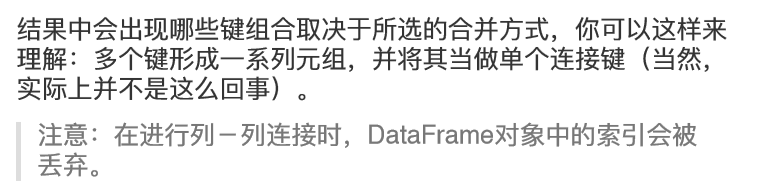

对于合并运算需要考虑的最后⼀个问题是对重复列名的处理。虽 然你可以⼿⼯处理列名重叠的问题（查看前⾯介绍的重命名轴标 签），但merge有⼀个更实⽤的suffixes选项，⽤于指定附加到左 右两个DataFrame对象的重叠列名上的字符串： 

In [44]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [46]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))  #处理重名的操作

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


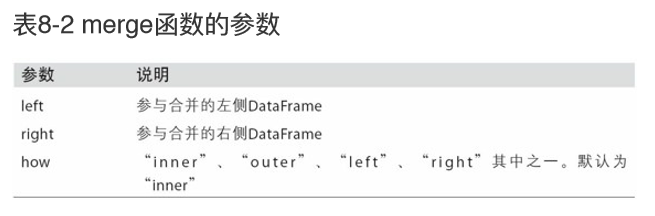

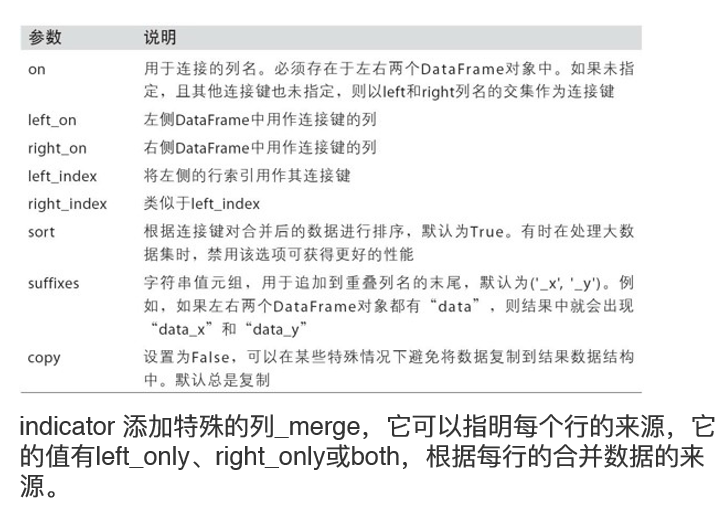

### 索引上的合并

In [3]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [4]:
right1

,group_val
a,3.5
b,7.0


In [5]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


对于层次化索引的数据，事情比较复杂，因为索引的合并默认是多键合并

In [7]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [8]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

这个时候，你必须以列表的形式指明⽤作合并键的多个列（注 意⽤how='outer'对重复索引值的处理）： 

In [9]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [10]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [11]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [12]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [14]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


DataFrame还有⼀个便捷的join实例⽅法，它能更为⽅便地实现 按索引合并。它还可⽤于合并多个带有相同或相似索引的 DataFrame对象，但要求没有重叠的列。

In [15]:
left2.join(right2, how='outer')  

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


DataFrame的默认使用的是左连接，保留左边表的行索引

In [17]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [18]:
right1

,group_val
a,3.5
b,7.0


In [16]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [19]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [21]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [22]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [24]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [25]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [27]:
left2.join([right2, another], how='outer')

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6848: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### 轴向连接

In [28]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

对于pandas对象（如Series和DataFrame），带有标签的轴使你 能够进⼀步推⼴数组的连接运算。具体点说，你还需要考虑以下 这些东⻄： 
- 如果对象在其它轴上的索引不同，我们应该合并这些轴的不 同元素还是只使⽤交集？ 
- 连接的数据集是否需要在结果对象中可识别？ 
- 连接轴中保存的数据是否需要保留？许多情况下， DataFrame默认的整数标签最好在连接时删掉

In [31]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [32]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

默认情况下，concat是在axis=0上工作的，最终产生一个新的series.如果传入axis=1,则结果就会变成一个dataframe

In [33]:
pd.concat([s1, s2, s3], axis=1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [34]:
s4 = pd.concat([s1, s3])

In [35]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [36]:
pd.concat([s1, s4], axis=1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [38]:
pd.concat([s1, s4],axis=1, join='inner')

,0,1
a,0,0
b,1,1


你可以通过join_axes指定要在其他轴上使用的索引

In [39]:
pd.concat([s1,s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [40]:
s1

a    0
b    1
dtype: int64

In [41]:
s4

a    0
b    1
f    5
g    6
dtype: int64

有个问题，就是参与连接的片段在结果中区分不开。假设你想要在连接轴上创建一个层次化索引，使用keys参数即可达到这个目的

In [42]:
result = pd.concat([s1, s2, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [43]:
s2

c    2
d    3
e    4
dtype: int64

In [44]:
s3

f    5
g    6
dtype: int64

In [45]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [46]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


同样的逻辑也适合DataFrame对象

In [52]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [53]:
df2

,three,four
a,5,6
c,7,8


In [54]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [55]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

此外还有两个用于管理层次化索引创建方式的参数。我们可以用names参数命名创建的轴级别

In [56]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [57]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

,a,b,c,d
0,1.669025,-0.438570,-0.539741,0.476985
1,3.248944,-1.021228,-0.577087,0.124121
2,0.302614,0.523772,0.000940,1.343810


In [58]:
df2

,b,d,a
0,-0.713544,-0.831154,-2.370232
1,-1.860761,-0.860757,0.560145


In [59]:
pd.concat([df1, df2], ignore_index=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,1.669025,-0.438570,-0.539741,0.476985
1,3.248944,-1.021228,-0.577087,0.124121
2,0.302614,0.523772,0.000940,1.343810
3,-2.370232,-0.713544,NaN,-0.831154
4,0.560145,-1.860761,NaN,-0.860757


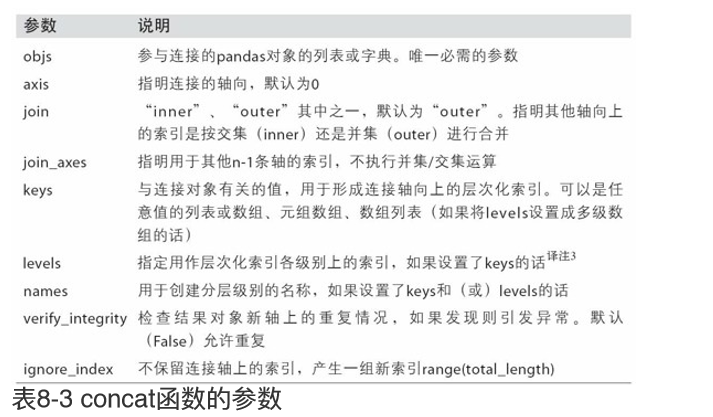

### 合并重叠数据

In [60]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [63]:
b[-1] = np.nan

In [64]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [65]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [66]:
np.where(pd.isnull(a), a, b)

array([nan,  1., nan,  3.,  4., nan])

In [67]:
b[:-2].combine_first(a[2:])  #combine_first 实现一样的功能

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

对于DataFrame，combine_first⾃然也会在列上做同样的事情， 因此你可以将其看做：⽤传递对象中的数据为调⽤对象的缺失数 据“打补丁”： 

In [68]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [69]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [70]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 重塑和轴向旋转

### 重塑层次化索引

层次化索引为DataFrame数据的重排任务提供了⼀种具有良好⼀ 致性的⽅式。主要功能有⼆： 
- stack：将数据的列“旋转”为⾏。 
- unstack：将数据的⾏“旋转”为列

In [72]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [73]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [74]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


默认情况下，unstack操作的是最内层（stack也是如此）。传入分层级别的编号活名称即可对其他级别进行unstack操作

In [75]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [76]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


如果不是所有的级别值都能在各分组中找到的话，则unstack操作可能会引入缺失数据

In [78]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [79]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [80]:
#stack默认会滤除缺失缺失数据，因此该运算时可逆的
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [81]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

对DataFrame进行unstack操作时，作为旋转轴的级别将会成为结果中的最低级别

In [83]:
df = pd.DataFrame({'left': result, 'right': result+5}, 
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

### 将“长格式”转化成“宽格式”

In [84]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [85]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')

In [86]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [87]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)

In [88]:
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
5,2834.390,0.14,5.2
6,2839.022,2.70,5.6
7,2802.616,1.21,6.3
8,2819.264,-0.40,6.8
9,2872.005,1.47,7.0


In [89]:
data.index = periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
1960-06-30 23:59:59.999999999,2834.390,0.14,5.2
1960-09-30 23:59:59.999999999,2839.022,2.70,5.6
1960-12-31 23:59:59.999999999,2802.616,1.21,6.3
1961-03-31 23:59:59.999999999,2819.264,-0.40,6.8


In [91]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [92]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [93]:
data.stack()

date                           item   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                               unemp          5.100
1959-09-30 23:59:59.999999999  realgdp     2775.488
                               infl           2.740
                               unemp          5.300
1959-12-31 23:59:59.999999999  realgdp     2785.204
                                            ...    
2008-12-31 23:59:59.999999999  unemp          6.900
2009-03-31 23:59:59.999999999  realgdp    12925.410
                               infl           0.940
                               unemp          8.100
2009-06-30 23:59:59.999999999  realgdp    12901.504
                               infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.99999

In [94]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [95]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
1960-06-30 23:59:59.999999999,0.14,2834.390,5.2
1960-09-30 23:59:59.999999999,2.70,2839.022,5.6
1960-12-31 23:59:59.999999999,1.21,2802.616,6.3
1961-03-31 23:59:59.999999999,-0.40,2819.264,6.8


前两个传递的值分别⽤作⾏和列索引，最后⼀个可选值则是⽤于 填充DataFrame的数据列。

In [96]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-1.265934
1,1959-03-31 23:59:59.999999999,infl,0.000,0.119827
2,1959-03-31 23:59:59.999999999,unemp,5.800,-1.063512
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.332883
4,1959-06-30 23:59:59.999999999,infl,2.340,-2.359419
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.199543
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-1.541996
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.970736
8,1959-09-30 23:59:59.999999999,unemp,5.300,-1.307030
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,0.286350


In [99]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.119827 -1.265934   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -2.359419  0.332883   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.970736 -1.541996   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.377984  0.286350   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  1.349742  0.331286   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -1.063512  
1959-06-30 23:59:59.999999999 -0.199543  
1959-09-30 23:59:59.999999999 -1.307030  
1959-12-31 23:59:59.999999999 -0.753887  
1960-03-31 23:59:59.999999999  0.069877

In [100]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


【注意】pivot其实就是用set_index创建层次化索引，再用unstack重塑

In [102]:
unstack = ldata.set_index(['date', 'item']).unstack('item')
unstack[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.119827 -1.265934   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -2.359419  0.332883   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.970736 -1.541996   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.377984  0.286350   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  1.349742  0.331286   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -0.011862  0.246674   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.919262  1.327195   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -1.063512  
1959-06-30 23:59:59.999999999 -0.199543  
1959-09-30 23:59:59.999999999 -1.307030  
1959-12-31 23:59:59.999999999 -0.753887  
1960-03-31 23:59:59.999999999  0.069877  
1960-06-30 23:59:59.999999999  1.004812  
1960-09-30 23:59:59.999999999 -1.549106

### 将“宽格式”转换为“长格式“

In [103]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


key列可能是分组指标，其它的列是数据值。当使⽤ pandas.melt，我们必须指明哪些列是分组指标。下⾯使⽤key作 为唯⼀的分组指标：·

In [104]:
melted = pd.melt(df, ['key'])

In [105]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [106]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [108]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [109]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [110]:
pd.melt(df, value_vars=['A', 'B', 'C'])


,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [111]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
